Prediction of Breast Cancer Severity with Multi-Omics (mutations, copy numbes, gene expression and protein levels)

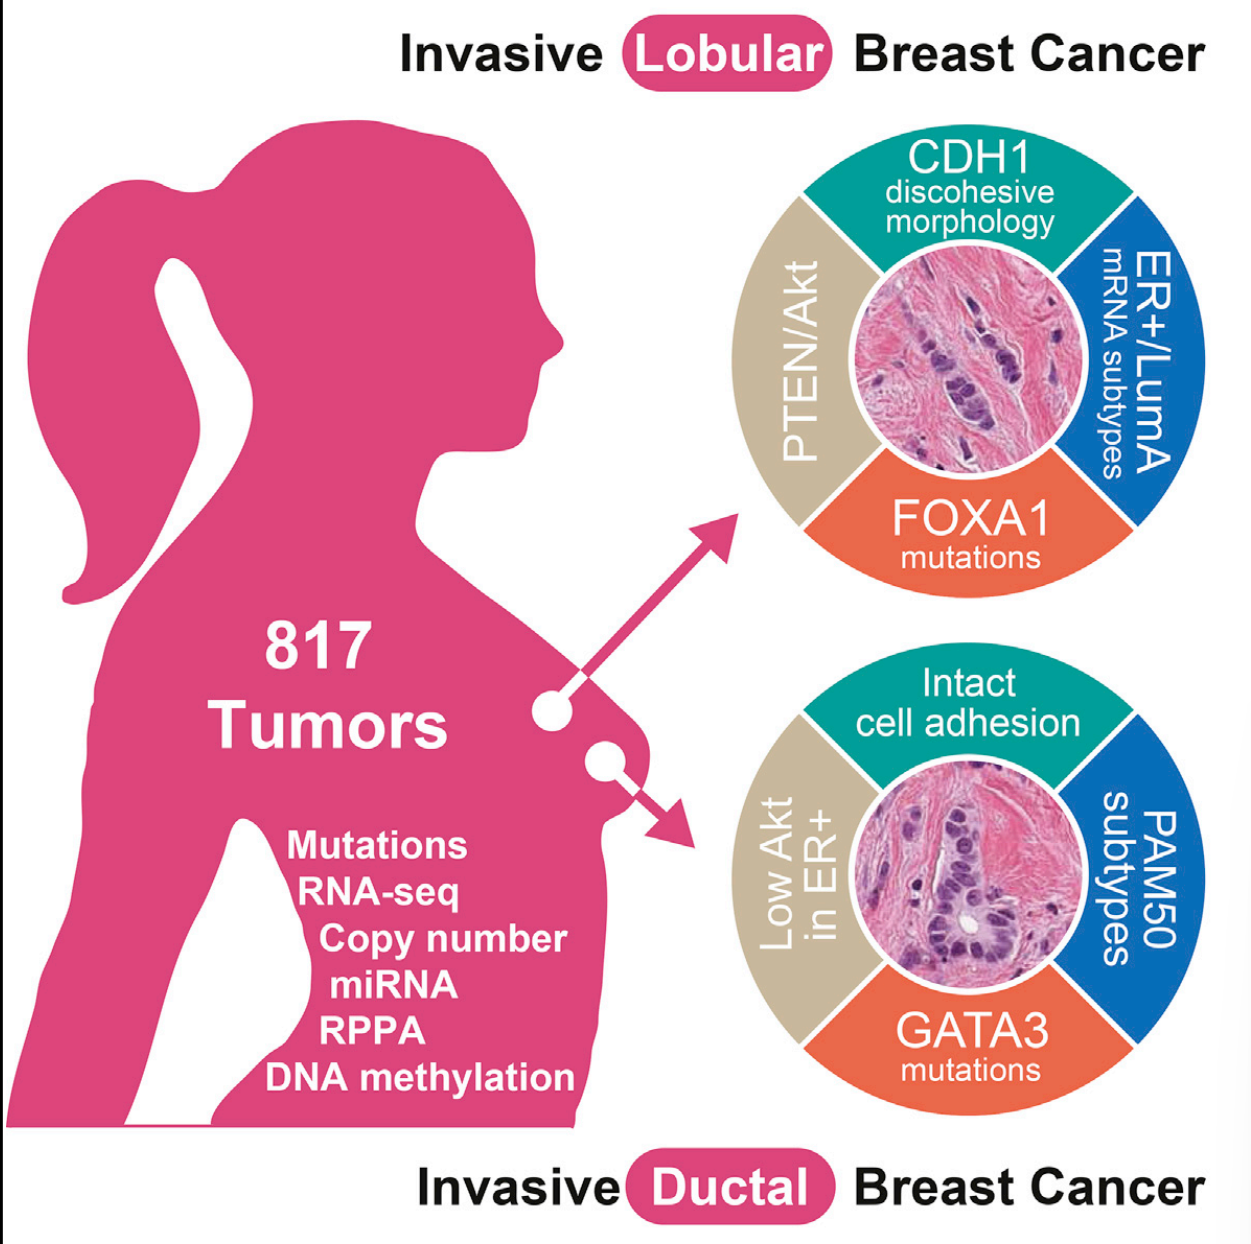

The Dataset

705 breast tumour samples (611 patients survived, 94 patients died)
Four Data Types (n features):

-Copy Number Variations (860)

-Somatic Mutations (249)

-Gene Expression (604)

-Protein Expression (223)

Total: 1936 features

The dataset is described in detail in the paper: https://www.cell.com/cell/fulltext/S0092-8674(15)01195-2

In this notebook i'll use:
feyn module to access the QLattice, and the pandas module to access the data, and sklearn to split the data in test/train sets

In [1]:
!pip install feyn==2.1.4

     |████████████████████████████████| 334 kB 5.4 MB/s 
     |████████████████████████████████| 104 kB 45.7 MB/s 
     |████████████████████████████████| 66 kB 4.3 MB/s 
     |████████████████████████████████| 138 kB 39.7 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Feyn is a Python module for interacting with the QLattice

In [2]:
import feyn
import pandas as pd
import sklearn.model_selection

Load the dataset

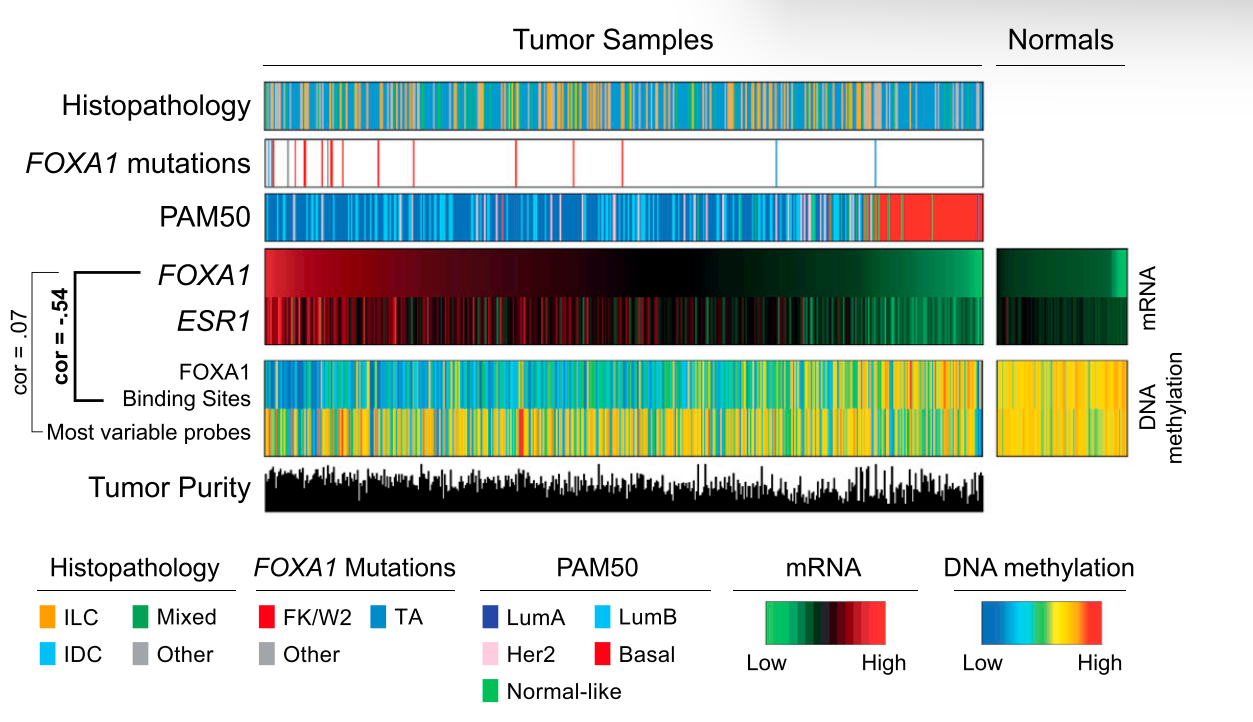

In [3]:
data = '/content/data.csv'
df = pd.read_csv(data)
df.iloc[:,1400:1500]

,cn_SNAP25,cn_FLRT3,cn_PCSK2,cn_PTPRT,cn_BCAS1,cn_CYP24A1,cn_BMP7,cn_PCK1,cn_ZBP1,cn_C20orf85,...,mu_CUBN,mu_DMD,mu_DNAH8,mu_GOLGA6L2,mu_HYDIN,mu_MUC12,mu_PLCE1,mu_RYR2,mu_USH2A,mu_AHNAK
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
2,1,1,1,2,2,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,2,2,2,2,2,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
702,0,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
703,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Let's have a quick look at the balance of target variable

In [4]:
df["vital.status"].value_counts()

0    611
1     94
Name: vital.status, dtype: int64

The target variable is more unbalanced. Let's make sure we account for that when we split our data into train and test. We want to make sure to have the same ratio of cases/controls in both.

In [5]:
train, test = sklearn.model_selection.train_test_split(df,stratify=df["vital.status"], train_size=.66, random_state=42)

**QLattice** is a quantum simulator that runs on Abzu's hardware, but i can allocate it to use for my analysis using **feyn**

In [6]:
ql = feyn.connect_qlattice()

A new community QLattice has been allocated for you. This temporary QLattice is available for personal/non-commercial use. By using this community QLattice you agree to the terms and conditions which can be found at `https://abzu.ai/privacy`.


Search for the best model using QLattice.
so the i used QLattice to search for the best mathematical model to explain the data.

for more about QLattice can be found here:: https://docs.abzu.ai/docs/guides/essentials/auto_run.html.


In [8]:
ql.reset(random_seed=42)
models = ql.auto_run(train, output_name="vital.status", kind="classification", criterion = None, n_epochs=200, max_complexity=3)

Epoch no. 1/200 - Tried 469 models - Elapsed: 3s of 10.5m. (est.)
Epoch no. 2/200 - Tried 1132 models - Elapsed: 11s of 19.0m. (est.)
Epoch no. 3/200 - Tried 1775 models - Elapsed: 18s of 20.7m. (est.)
Epoch no. 4/200 - Tried 2421 models - Elapsed: 27s of 22.9m. (est.)
Epoch no. 5/200 - Tried 3071 models - Elapsed: 36s of 24.1m. (est.)
Epoch no. 6/200 - Tried 3689 models - Elapsed: 44s of 24.9m. (est.)
Epoch no. 7/200 - Tried 4379 models - Elapsed: 53s of 25.6m. (est.)
Epoch no. 8/200 - Tried 5038 models - Elapsed: 1m 3s of 26.3m. (est.)
Epoch no. 9/200 - Tried 5677 models - Elapsed: 1m 12s of 26.7m. (est.)
Epoch no. 10/200 - Tried 6339 models - Elapsed: 1m 21s of 27.1m. (est.)
Epoch no. 11/200 - Tried 6980 models - Elapsed: 1m 30s of 27.5m. (est.)
Epoch no. 12/200 - Tried 7625 models - Elapsed: 1m 39s of 27.8m. (est.)
Epoch no. 13/200 - Tried 8285 models - Elapsed: 1m 49s of 28.1m. (est.)
Epoch no. 14/200 - Tried 8936 models - Elapsed: 1m 58s of 28.3m. (est.)
Epoch no. 15/200 - Tried 

<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="216.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 621 216.0" width="621" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="155.0" width="351" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="241" y="50.0"><title>vital.status
logistic:
w=5.6542
bias=-2.2997</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="71.5">vital.st..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="59.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="243" y="59.0">out</text><line stroke="#1E1E1E" x1="211" x2="241" y1="67.5" y2="67.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="50.0"><title>gaussian2</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="71.5">gaussian</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="59.0">1</text><line stroke="#1E1E1E" x1="91" x2="121" y1="37.5" y2="58.5" /><line stroke="#1E1E1E" x1="91" x2="121" y1="97.5" y2="76.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="20.0"><title>rs_MMP1
linear:
scale=0.134570
scale offset=6.265840
w=-4.226500
bias=-2.8169</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="41.5">rs_MMP1</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="29.0">2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="29.0">num</text><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="80.0"><title>rs_MRAP
linear:
scale=0.185242
scale offset=2.457192
w=-1.745526
bias=1.9694</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="101.5">rs_MRAP</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="89.0">3</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="89.0">num</text></svg><svg class="summary" height="79" width="180" x="351" y="0"><defs /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="0" y="14">Training Metrics</text><line stroke="#1E1E1E" x1="0" x2="160" y1="19" y2="19" /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="34">Accuracy</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="34">0.899</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="49">AUC</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="49">0.617</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="64">Precision</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="64">0.826</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" x="5" y="79">Recall</text><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="end" x="155" y="79">0.306</text></svg><svg class="summary" height="79" width="90" x="531" y="0"><defs /><text fill="#1E1E1E" font-family="monospace" font-size="14" text-anchor="start" 
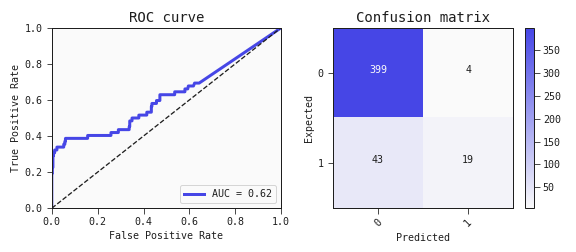
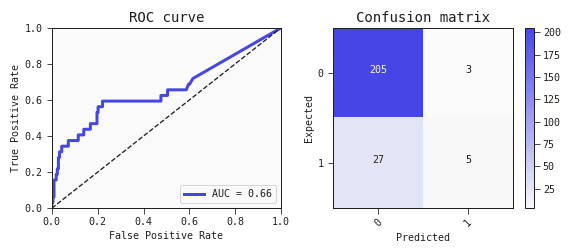

In [9]:
models[0].plot(train, test)

see what's going on in the model -  Plotting

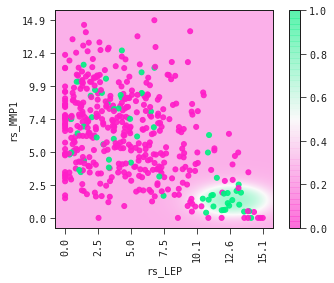

In [10]:
models[1].plot_response_2d(train)

unseen data

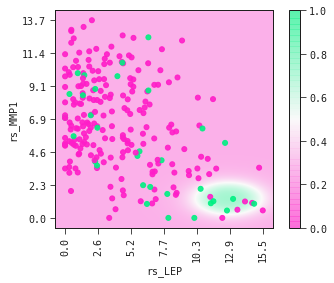

In [11]:
models[1].plot_response_2d(test)


Looking at the ROC curve

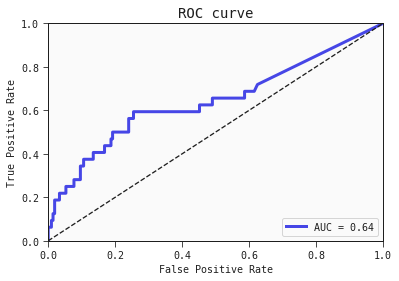

In [12]:
models[1].plot_roc_curve(test)

Giving some other machine-learning methods a try!

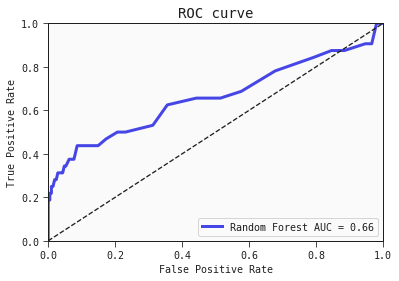

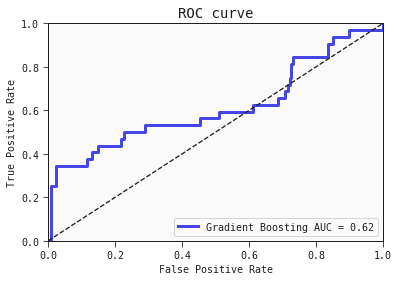

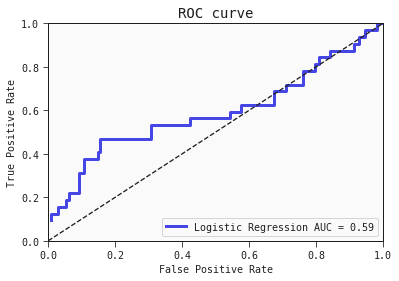

In [13]:
rf = feyn.reference.RandomForestClassifier(train, output_name="vital.status", random_state = 42)
gb = feyn.reference.GradientBoostingClassifier(train, output_name="vital.status", random_state = 42)
lr = feyn.reference.LogisticRegressionClassifier(train, output_name="vital.status", max_iter=10000, random_state = 42)

rf.plot_roc_curve(test, label="Random Forest")
gb.plot_roc_curve(test, label="Gradient Boosting")
lr.plot_roc_curve(test, label="Logistic Regression")

would QLattice be useful if run around exploring for a while?
In this example I'm loading in a model that was trained for 500 iterations (using criterion = "bic" and max_complexity = 7). This took much more time training

In [14]:
import numpy as np
def feature_correlations_map(train, target, correlation='pearson', scale_features=True, abs_values = False):

    from sklearn.decomposition import PCA
    import plotly.express as px
    
    target_abs = f"{target}_abs"

    data_corr = train.corr(correlation).drop(target, axis = 0)

    target_corr = data_corr[target].values.copy()
    data_corr = data_corr.drop(target, axis = 1)

    features = data_corr.columns

    if scale_features:
        from sklearn.preprocessing import StandardScaler
        x = data_corr.loc[:, features].values
        data_corr = StandardScaler().fit_transform(x)

    
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(data_corr)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2'])

    principalDf[target] = target_corr
    principalDf[target_abs] = np.abs(target_corr)
    principalDf['Features'] = features
    
    color_feature = target
    
    if abs_values:
        color_feature = target

    fig = px.scatter(principalDf, x="PC1",
                    y="PC2", color=color_feature, hover_name="Features", width=1000, height=800)

    fig.add_annotation(text=f'Variance explained <br>PC1: {"{:.0%}".format(pca.explained_variance_ratio_[0])} <br>PC2: {"{:.0%}".format(pca.explained_variance_ratio_[1])}', 
                    align='left',
                    showarrow=False,
                    xref='paper',
                    yref='paper',
                    x=0.98,
                    y=0.98,
                    bordercolor='black',
                    borderwidth=1)

    fig.show()

In [15]:
multi_model = feyn.Model.load("/content/model1_500its_mc7.model")

<?xml version="1.0" encoding="utf-8" ?>
<svg baseProfile="full" height="248.0" preserveAspectRatio="none" version="1.1" viewBox="0 0 861 248.0" width="861" xmlns="http://www.w3.org/2000/svg" xmlns:ev="http://www.w3.org/2001/xml-events" xmlns:xlink="http://www.w3.org/1999/xlink"><defs /><svg class="graph" height="155.0" width="591" x="0" y="0"><defs /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="481" y="50.0"><title>vital.status
logistic:
w=-2.8190
bias=-2.3839</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="526.0" y="71.5">vital.st..</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="569" y="59.0">0</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="483" y="59.0">out</text><line stroke="#1E1E1E" x1="451" x2="481" y1="67.5" y2="67.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="361" y="50.0"><title>multiply</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="406.0" y="71.5">multiply</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="449" y="59.0">1</text><line stroke="#1E1E1E" x1="331" x2="361" y1="37.5" y2="58.5" /><line stroke="#1E1E1E" x1="331" x2="361" y1="97.5" y2="76.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="241" y="20.0"><title>mu_TNXB
linear:
scale=2.000000
scale offset=0.030733
w=-6.401883
bias=-3.8363</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="41.5">mu_TNXB</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="29.0">2</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="243" y="29.0">num</text><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="241" y="80.0"><title>gaussian2</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="286.0" y="101.5">gaussian</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="329" y="89.0">3</text><line stroke="#1E1E1E" x1="211" x2="241" y1="37.5" y2="88.5" /><line stroke="#1E1E1E" x1="211" x2="241" y1="97.5" y2="106.5" /><rect class="node" fill="#FAFAFA" height="35" stroke="#FF1EC8" stroke-width="1" width="90" x="121" y="20.0"><title>add</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="166.0" y="41.5">add</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="209" y="29.0">4</text><line stroke="#1E1E1E" x1="91" x2="121" y1="37.5" y2="28.5" /><line stroke="#1E1E1E" x1="91" x2="121" y1="97.5" y2="46.5" /><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="20.0"><title>rs_KRT23
linear:
scale=0.151624
scale offset=8.622495
w=-1.196604
bias=0.9873</title></rect><text fill="#1E1E1E" font-family="monospace" font-size="12" style="pointer-events:none" text-anchor="middle" x="46.0" y="41.5">rs_KRT23</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="end" x="89" y="29.0">5</text><text fill="#1E1E1E" font-family="monospace" font-size="10" style="pointer-events:none" text-anchor="start" x="3" y="29.0">num</text><rect class="node" fill="#00F082" height="35" stroke="#1E1E1E" stroke-width="1" width="90" x="1" y="80.0"><title>rs_APOB
linear:
scale=0.149502
scale offset=2.396930
w=
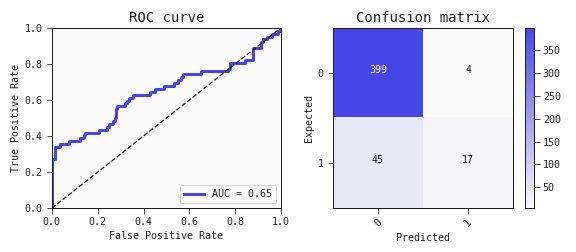
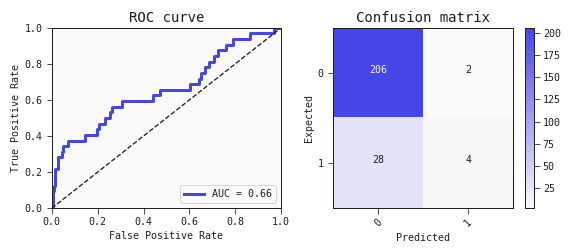

In [16]:
multi_model.plot(train, test)

This model includes three different data types: Gene expression (rs), copy numbers (cn) and mutations (mu).
 
We didn't even have to do anything special to the data, the QLattice figured out the correct normalisations itself!

Looking at people without TNXB mutations

In people without TNXB mutations both high APOB and KRT23 gene expression are associated with death.

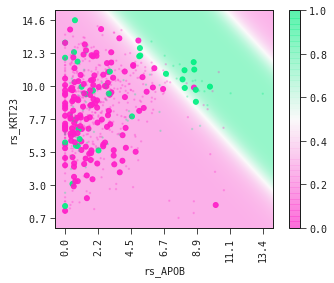

In [17]:
#TNXB mutation no
multi_model.plot_response_2d(df, fixed = {"mu_TNXB" : 0, "cn_ANKRD30B" : -1})

In the above graph, individuals with high APOB and KRT23 gene-expression seem to be at risk of dying.

Looking at TNXB mutation carriers

In people with a TNXB mutation only high APOB is required for a case to be fatal.

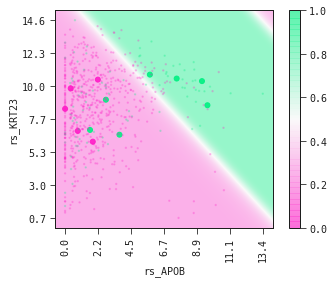

In [18]:
#TNXB mutation yes
multi_model.plot_response_2d(df, fixed = {"mu_TNXB" : 1, "cn_ANKRD30B" : -1})

Here, high levels of APOB are predicted to be detrimental, no matter the levels of KRT23.